In [1]:
import os
import pandas as pd
import numpy as np

#get rid of future warnings with seaborn
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [2]:
# look at the file name
names = os.listdir('input');
names

['.ipynb_checkpoints', 'Bank_Personal_Loan_Modelling.xlsx', 'random_file.png']

In [3]:
#get the path to the file
path = 'input/' + names[1]
path

'input/Bank_Personal_Loan_Modelling.xlsx'

In [4]:
master = pd.read_excel(path, 'Data')

In [5]:
master.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

### Variables definition


> - **ID** - Customer ID 
> - **Age** - Customer's age in completed years 
> - **Experience** - #years of professional experience 
> - **Income** - Annual income of the customer - in thousands usd 
> - **ZIPCode** - Home Address ZIP code. 
> - **Family** - Family size of the customer 
> - **CCAvg** - Avg. spending on credit cards per month - in thousands usd 
> - **Education** - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional 
> - **Mortgage** - Value of house mortgage if any - in thousands usd  
> - **Personal Loan**  - Did this customer accept the personal loan offered in the last campaign? 
> - **Securities Account** - Does the customer have a securities account with the bank? 
> - **CD Account** - Does the customer have a certificate of deposit (CD) account with the bank? 
> - **Online** - Does the customer use internet banking facilities? 
> - **CreditCard** - Does the customer uses a credit card issued by UniversalBank?

In [6]:
#for more convinient - reposition "Personal Loan"  column since it is our target column for research
a = master['Personal Loan']
master.drop('Personal Loan', axis = 1, inplace = True)
master['Personal Loan'] = a

In [7]:
master.head(1)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   

   Securities Account  CD Account  Online  CreditCard  Personal Loan  
0                   1           0       0           0              0

# <br><br>

## Assess Data

In [8]:
df = master.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Personal Loan         5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Personal Loan            2
dtype: int64

> **Observation**
> - No null values
> - No missing values
> - Columns "ID", "ZIP Code", 'Family', 'Education' are categorical variables. Should be in 'str' type

In [10]:
df.describe().transpose()

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937913     1.747666     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0  
Personal Loan           0.0      0.00      1.0

> **Observation**
> - Column "Experience" has some negative value. Need to fix
> - Binary variables "Personal Loan", "CreditCard", "Online", "CD Account", "Securities Account" has clean data
> - Ordinary Cat variables "Family" and "Education" are clean too  

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

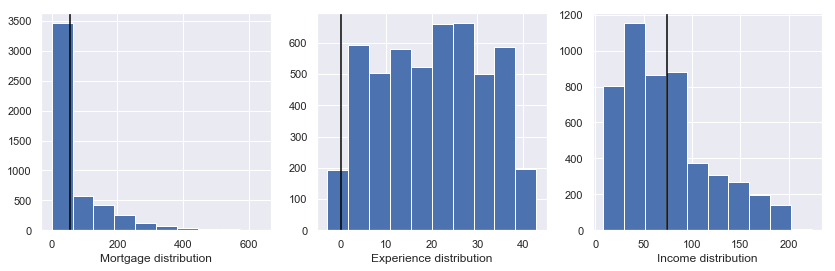

In [12]:
#cols = ['Experience', 'Mortgage']
fig, [ax0, ax1, ax2] = plt.subplots(1,3, figsize = (14,4))

ax0.hist(df.Mortgage)
ax0.set_xlabel('Mortgage distribution')
ax0.axvline(df.Mortgage.mean(), color = "black")

ax1.hist(df.Experience)
ax1.set_xlabel('Experience distribution')
ax1.axvline(0, color = "black");

ax2.hist(df.Income)
ax2.set_xlabel('Income distribution')
ax2.axvline(df.Income.mean(), color = "black");

### Summary Assess Data
> - Columns "ID", "ZIP Code", 'Family', 'Education' are nominal variables. Should be in 'str' type
> - Column "Experience" has some negative value. Need to fix

No bad tidiness issues


# <br>

## Clean Data

#### Define

Columns "ID", "ZIP Code", 'Family', 'Education' are nominal variables

#### Code

In [13]:
df[['ID','ZIP Code','Family', 'Education']] = df[['ID','ZIP Code', 'Family', 'Education']].astype('str')

#### Test

In [14]:

df[['ID', 'ZIP Code', 'Family', 'Education']].dtypes

ID           object
ZIP Code     object
Family       object
Education    object
dtype: object

# <br>

#### Define

Column "Experience" has some negative value

#### Code

In [15]:
#check the ammount of negative values
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

##### Lets find the quantitive variable with strong correlation with 'Experience'

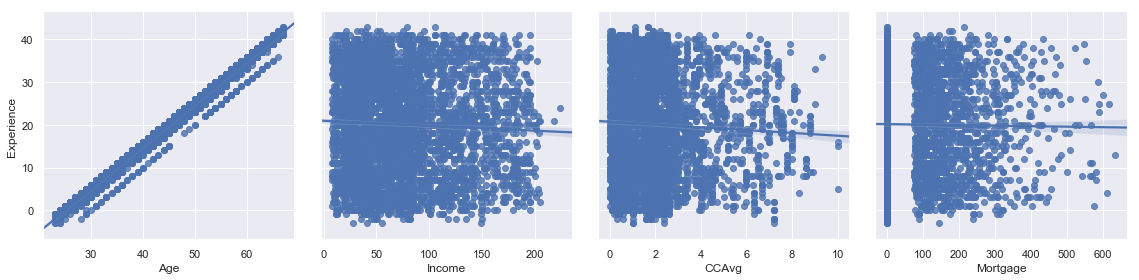

In [16]:
ncol = ['Age', 'Income','CCAvg', 'Mortgage']
grid = sns.PairGrid(df, y_vars = 'Experience', x_vars = ncol, height = 4)
grid.map(sns.regplot);

'Age' has a very strong correlation with 'Experience

Get the subset of 'Age' data with negative values in 'Experience

In [17]:
df[df['Experience'] < 0]['Age'].value_counts()

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

**Observation:**

The subset of each age with negative values in 'Experience' is definitely small. 

**Decision:**
We can replace each negative 'Experience' value with the mean of positive 'Experience' value associated with the particular 'Age' value

<br>
Get a list of 'Age' values where we found some negative values in 'Experience'

In [18]:
ages = df[df['Experience'] < 0]['Age'].unique().tolist()
ages

[25, 24, 28, 23, 29, 26]

Get indexes of negative values in 'Experience'

In [19]:
indexes = df[df['Experience'] < 0].index.tolist()

Replace nagative 'Experience' values with the means

In [20]:
for i in indexes:
    for x in ages:
        df.loc[i,'Experience'] = df[(df.Age == x) & (df.Experience > 0)].Experience.mean()

#### Test

In [21]:
df[df['Experience'] < 0]['Age'].value_counts()

Series([], Name: Age, dtype: int64)

In [22]:
df.Experience.describe()

count    5000.000000
mean       20.135743
std        11.413140
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

# <br>
All Data is clean and we can start Analysis
<br> 

# Analysis

### Questions

> - Is there some correlation between personal characteristics and the fact that person obtained Personal Loan (Loan Fact)? If so:
> - What are those Main Characteristics that has a higher correlation with Loan Fact and what the strength of correlation?
> - What the Segments of Main Characteristics, that has a higher ratio of conversion customers into the Personal Loaners?
> - What is the sample of Data with persons from Main Segments.
> - What is the probability of person obtain Personal Loan if his/her characteristics come from Main Segments?

###  Is there some correlation between personal characteristics and the fact that person obtained Personal Loan?

Since our control variable "Personal Loan" is a categorical variable, we want to use Logistic Regression to find the correlations if any exist. As a Null Hypothesis, we assume  that variable **does not** correlate with "Personal Loan"

**First** let's see if some variables has a strong relationship with each other


In [23]:
df.corr(method='pearson')

Age  Experience    Income     CCAvg  Mortgage  \
Age                 1.000000    0.994010 -0.055269 -0.052030 -0.012539   
Experience          0.994010    1.000000 -0.046959 -0.049889 -0.011046   
Income             -0.055269   -0.046959  1.000000  0.645993  0.206806   
CCAvg              -0.052030   -0.049889  0.645993  1.000000  0.109909   
Mortgage           -0.012539   -0.011046  0.206806  0.109909  1.000000   
Securities Account -0.000436   -0.001063 -0.002616  0.015087 -0.005411   
CD Account          0.008043    0.009711  0.169738  0.136537  0.089311   
Online              0.013702    0.013951  0.014206 -0.003620 -0.005995   
CreditCard          0.007681    0.008914 -0.002385 -0.006686 -0.007231   
Personal Loan      -0.007726   -0.008338  0.502462  0.366891  0.142095   

                    Securities Account  CD Account    Online  CreditCard  \
Age                          -0.000436    0.008043  0.013702    0.007681   
Experience                   -0.001063    0.009711  0.013951    0.008914   
Income                       -0.002616    0.169738  0.014206   -0.002385   
CCAvg                         0.015087    0.136537 -0.003620   -0.006686   
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231   
Securities Account            1.000000    0.317034  0.012627   -0.015028   
CD Account                    0.317034    1.000000  0.175880    0.278644   
Online                        0.012627    0.175880  1.000000    0.004210   
CreditCard                   -0.015028    0.278644  0.004210    1.000000   
Personal Loan                 0.021954    0.316355  0.006278    0.002802   

                    Personal Loan  
Age                     -0.007726  
Experience              -0.008338  
Income                   0.502462  
CCAvg                    0.366891  
Mortgage                 0.142095  
Securities Account       0.021954  
CD Account               0.316355  
Online                   0.006278  
CreditCard               0.002802  
Personal Loan            1.000000

in short way...

In [24]:
df.corr().abs().unstack().drop_duplicates().nlargest(4)

Age     Age              1.000000
        Experience       0.994010
Income  CCAvg            0.645993
        Personal Loan    0.502462
dtype: float64

**Observation**
We have strong correlation between 'Age' and 'Experience' with r = 0.994010<br>

Decided to exclude 'Experience' from the Analysis
<br><br><br>

**Let's split data frame by type of variables** and then apply to each subset a logistic regression model. Its'  convenient way to track the path and keep an eye at every detail. 
Include 'Personal Loan' into each part as soon as it is our target variable

**Quantative variables** are as below:
> - Age
> - Income 
> - CCAvg 
> - Mortage 


**Categorical Variables are:**

> - ZIP COde
> - Family 
> - Education 


**Binary variables are:**

> - Securities Account
> - CD Account
> - Online 
> - Credit Card 

In [25]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan'],
      dtype='object')

#### data frame for quantative vars

In [26]:
num_df = df[['Age', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']].copy()

In [27]:
num_df.head(1)

Age  Income  CCAvg  Mortgage  Personal Loan
0   25      49    1.6         0              0

In [28]:
#double check dtypes
num_df.dtypes

Age                int64
Income             int64
CCAvg            float64
Mortgage           int64
Personal Loan      int64
dtype: object

#### data frame for binary vars

In [29]:
bin_df = df[['Securities Account', 'CD Account', 'Online', 'CreditCard','Personal Loan']].copy()

In [30]:
bin_df.head(1)

Securities Account  CD Account  Online  CreditCard  Personal Loan
0                   1           0       0           0              0

In [31]:
#double check dtypes
bin_df.dtypes

Securities Account    int64
CD Account            int64
Online                int64
CreditCard            int64
Personal Loan         int64
dtype: object

#### data frame for categorical vars

In [32]:
cat_df = df[['ZIP Code', 'Family', 'Education', 'Personal Loan']].copy()

In [33]:
cat_df.head(1)

ZIP Code Family Education  Personal Loan
0    91107      4         1              0

In [34]:
#double check dtypes
cat_df.dtypes

ZIP Code         object
Family           object
Education        object
Personal Loan     int64
dtype: object

In [35]:
#double check nuniques
cat_df.nunique()

ZIP Code         467
Family             4
Education          3
Personal Loan      2
dtype: int64

>  Seems we will have a big deal with ZIP Code

### Let's create and fit logistic model 

In [36]:
import statsmodels.api as sm

#### NUM_DF

In [37]:
num_df.columns

Index(['Age', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan'], dtype='object')

In [38]:
num_df['intercept'] = 1

In [39]:
#exclude column "Personal Loan" from independent vars
num_df_columns = num_df.columns.drop('Personal Loan').tolist()

In [40]:
# create and fit the logistic model
log_mod = sm.Logit(num_df['Personal Loan'], num_df[num_df_columns]).fit()

Optimization terminated successfully.
         Current function value: 0.200574
         Iterations 8


#### The bar chart of P-Values distribution and threshold line 

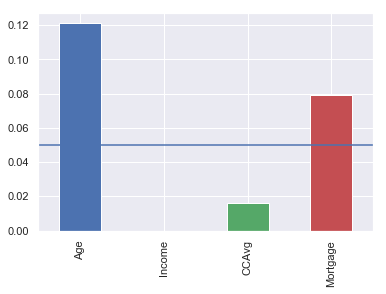

In [41]:
# exclude 'intercept'
log_mod.pvalues[0:4].plot.bar()
plt.axhline(y = 0.05);

#### The bar chart of coefficient distribution 

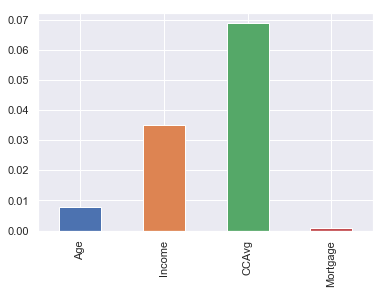

In [42]:
# exclude 'intercept'
log_mod.params[0:4].plot.bar();

#### filter columns with P-values less then 0.05 and store variables and it's coefficients into the dictionary

In [43]:
num_df_main_columns = {}
for i in num_df_columns:
    if log_mod.pvalues[i] < 0.05:
        num_df_main_columns[i] = log_mod.params[i]
    else:
        continue

In [44]:
num_df_main_columns

{'Income': 0.035086794726785976,
 'CCAvg': 0.06879405526062025,
 'intercept': -6.51443426285735}

#### Observation

We may say with confidence that two characteristics:
> - **'Income'** 
> - **'CCAvg'** 

..has correlation with 'Perconal Loan'

### Binary Vars

In [45]:
bin_df['intercept'] = 1

In [46]:
bin_df.columns

Index(['Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Personal Loan', 'intercept'],
      dtype='object')

In [47]:
#exclude column "Personal Loan" from independent vars
bin_df_columns = bin_df.columns.drop('Personal Loan').tolist()

In [48]:
# create and fit the logistic model
log_mod = sm.Logit(bin_df['Personal Loan'], bin_df[bin_df_columns]).fit()

Optimization terminated successfully.
         Current function value: 0.273620
         Iterations 7


In [49]:
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4995
Method:                           MLE   Df Model:                            4
Date:                Wed, 27 Mar 2019   Pseudo R-squ.:                  0.1347
Time:                        15:28:21   Log-Likelihood:                -1368.1
converged:                       True   LL-Null:                       -1581.0
                                        LLR p-value:                 7.257e-91
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Securities Account    -1.3318      0.201     -6.621      0.000      -1.726      -0.938
CD Account             3.8738      0.206     18.780      0.000       3.470       4.278
Online                -0.5107      0.111     -4.598      0.000      -0.728      -0.293
CreditCard            -1.1518      0.153     -7.508      0.000      -1.452      -0.851
intercept             -1.9991      0.081    -24.581      0.000      -2.159      -1.840
======================================================================================
"""

#### The bar chart of P-Values distribution and threshold line 

(0, 0.05)

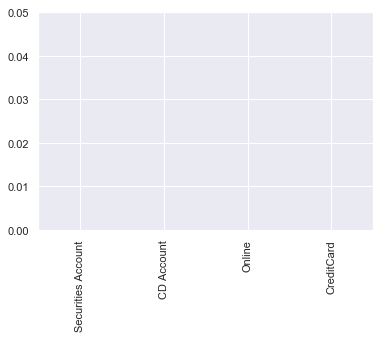

In [50]:
# exclude 'intercept'
log_mod.pvalues[0:4].plot.bar()
plt.ylim(0,0.05) # scale to "1e-11" and will see at least three of bars
#plt.axhline(y = 0.05);

#### The bar chart of coefficient distribution 

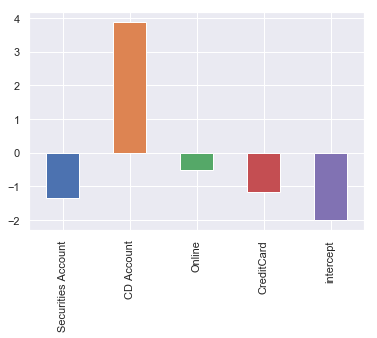

In [51]:
log_mod.params.plot.bar();

In [52]:
bin_df_main_columns = {}
for i in bin_df_columns:
    if log_mod.pvalues[i] < 0.05:
        bin_df_main_columns[i] = log_mod.pvalues[i]
    else:
        continue

In [53]:
bin_df_main_columns

{'Securities Account': 3.5732433506146845e-11,
 'CD Account': 1.0938847757925041e-78,
 'Online': 4.270036080977444e-06,
 'CreditCard': 6.023594394171727e-14,
 'intercept': 2.0175763875473002e-133}

#### Observation

We may say with confidence that four characteristics:
> - **'Securities Account'** 
> - **'CD Account'** 
> - **'Online'**
> - **'CreditCard'**

..has correlation with 'Perconal Loan'

### CATEGORICAL VARS

In [54]:
cat_df['intercept'] = 1

In [55]:
#exclude 'Personal Loan' from independent vars
cat_df_columns = cat_df.columns.drop('Personal Loan').tolist()

In [56]:
cat_df_columns

['ZIP Code', 'Family', 'Education', 'intercept']

#### Lets take care about ZIP Code

In [57]:
zip_df = cat_df[['Personal Loan',  'intercept', 'ZIP Code']].copy()

In [58]:
zip_df.head(2)

Personal Loan  intercept ZIP Code
0              0          1    91107
1              0          1    90089

In [59]:
zip_df.shape

(5000, 3)

In [60]:
#check uniques in Zip Code
zip_df['ZIP Code'].nunique()

467

In [61]:
zip_df['ZIP Code'].value_counts().nlargest(50);

##### Build dummy variebles by groups defined from first three digits of zip code

In [62]:
#get instance
zip_df.loc[0,'ZIP Code'], zip_df.loc[0,'ZIP Code'][:3] 

('91107', '911')

In [63]:
zip_df['ZIP Code'] = zip_df['ZIP Code'].str[:3]

In [64]:
#get instance
zip_df.loc[0,'ZIP Code']

'911'

In [65]:
zip_df['ZIP Code'].nunique()

57

In [66]:
zip_df.head(3)

Personal Loan  intercept ZIP Code
0              0          1      911
1              0          1      900
2              0          1      947

In [67]:
#create dummies
dum_zip_df = pd.get_dummies(zip_df, prefix = 'Z', drop_first = True)

In [68]:
dum_zip_df.shape

(5000, 58)

In [69]:
dum_zip_df.head(2)

Personal Loan  intercept  Z_902  Z_903  Z_904  Z_905  Z_906  Z_907  Z_908  \
0              0          1      0      0      0      0      0      0      0   
1              0          1      0      0      0      0      0      0      0   

   Z_910  ...    Z_953  Z_954  Z_955  Z_956  Z_957  Z_958  Z_959  Z_960  \
0      0  ...        0      0      0      0      0      0      0      0   
1      0  ...        0      0      0      0      0      0      0      0   

   Z_961  Z_966  
0      0      0  
1      0      0  

[2 rows x 58 columns]

In [70]:
#exclude 'Personal Loan' from independ vars
dum_zip_df_columns = dum_zip_df.columns.drop('Personal Loan').tolist()

In [71]:
dum_zip_df_columns[:10]

['intercept',
 'Z_902',
 'Z_903',
 'Z_904',
 'Z_905',
 'Z_906',
 'Z_907',
 'Z_908',
 'Z_910',
 'Z_911']

In [72]:
%%time
log_mod = sm.Loooogit(dum_zip_df['Personal Loan'], dum_zip_df[dum_zip_df_columns]).fit(maxiter = 5000000)

AttributeError: module 'statsmodels.api' has no attribute 'Loooogit'

In [73]:
dum_zip_df_main_columns = {}
for i in dum_zip_df_columns[:10]:
    if log_mod.pvalues[i] < 0.05:
        dum_zip_df_main_columns[i] = log_mod.pvalues[i]
    else:
        continue

KeyError: 'Z_902'

In [ ]:
dum_zip_df_main_columns

In [ ]:
log_mod.summary()

# <br>

### Conclusion

There are some correlations between Personal Loan and following variables:

> - 'Income',
> -  'Family',
> -  'CCAvg',
> -  'Education',
> -  'Securities Account',
> -  'CD Account',
> -  'Online',
> -  'CreditCard'

Lets find the strength of correlations

# <br>

### What are those Main Characteristics that has a higher correlation with Loan Fact and what the strength of correlation?

In [ ]:
#diveid list by, binary vars, categorical vars, interval vars


bin_colmn = ['Securities Account', 'CD Account', 'Online','CreditCard']

# for 
cat_colmn = ['Family','Education']

#for his plots
int_colmn = ['Income', 'CCAvg'] 

Let's see the charts with just this vars

In [ ]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'Income');

**Observation**
Most Loaners has income more than 100K and less than 200K

In [ ]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'CCAvg');

**Observation**
Most Loaners has average credit card spending arount 3K

In [ ]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'Family');

**Observation**
Most Loaners has family with 3 and 4 people

In [ ]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'Education');

**Observation**
Most Loaners has 2 and 3 level of Education

In [ ]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'Securities Account');

**Observation**
Most Loaners does not have Securities Account with The Bank

In [ ]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'CD Account');

**Observation**
Most Loaners does not have CD Account with The Bank

In [ ]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'Online');

**Observation**
Most Loaners do use online banking

In [ ]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'CreditCard');

**Observation**
Most Loaners does not have Credit Card in The Bank

#### Lets see closet to the main variables

In [ ]:
log_mod = sm. Logit(df['Personal Loan'], df[colmn]).fit()

In [ ]:
log_mod.params

In [ ]:
mfx = log_mod.get_margeff()

In [ ]:
mfx.summary()